# A first look at a neural network

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn classify hand-written digits.

The problem we are tying to solve is here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset. It's a set of 60,00 training images, plus 10,000 test images. This problem is known as the "Hello world" of deep learning. 

In [2]:
import keras
keras.__version__

'2.2.2'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the "test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [4]:
train_images.shape

(60000, 28, 28)

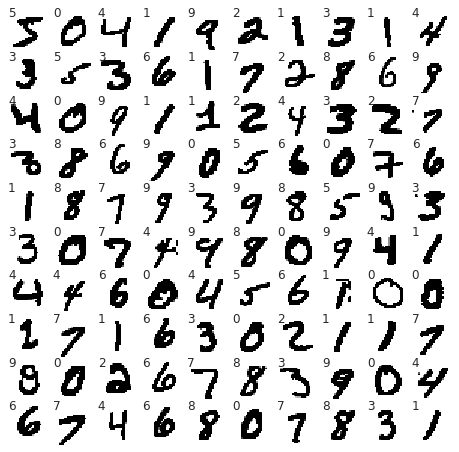

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                      subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(train_images[i], cmap='binary')
    im.set_clim(0, 16)
    im = axi.text(0, 4, str(train_labels[i]))

Let's see the data type of the labels:

In [23]:
train_labels.dtype

dtype('uint8')

Out workflow will be as follow: 
1. first we will present our neural network the training data: `train_images` and `train_labels`.
2. The network will then learn to associate images and labels.
3. We will verify if these predictions match the labels from `test_labels`.

In [25]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Here our network consist of a squence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick threee more things, as part of "compilation" step:
* A loss function: that is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [28]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels.

In [29]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

we are now ready to train our network, which in Keras is done via a call to `fit` method of the network: we "fit" the model to its training data.

In [36]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0029 - acc: 0.9992
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0021 - acc: 0.9994
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0018 - acc: 0.9996
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0012 - acc: 0.9998
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0014 - acc: 0.9997


In [37]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 119us/step


In [38]:
print('test_acc:', test_acc)

test_acc: 0.9825


Our test set accuracy turns out to be 98.25%-- that's quite a bit lower than the training set accuracy. This gab between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. 